In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
books = pd.read_csv("books10k/books.csv")

In [4]:
ratings = pd.read_csv("books10k/ratings.csv")

In [5]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [7]:
df = pd.merge(books,ratings,on="book_id")

In [8]:
df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
0,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,314,3
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,588,1
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2077,2
3,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2487,3
4,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2900,3


In [9]:
dff = df[['book_id','original_title','user_id','rating']]
dff.head()

,book_id,original_title,user_id,rating
0,3,Harry Potter and the Philosopher's Stone,314,3
1,3,Harry Potter and the Philosopher's Stone,588,1
2,3,Harry Potter and the Philosopher's Stone,2077,2
3,3,Harry Potter and the Philosopher's Stone,2487,3
4,3,Harry Potter and the Philosopher's Stone,2900,3


In [10]:
dff['book_id'].nunique()

812

In [11]:
dff['user_id'].nunique()

28906

In [12]:
ratings_new=pd.DataFrame(dff.groupby('original_title').mean()['rating'])
ratings_new['num_of_ratings']=pd.DataFrame(dff.groupby('original_title').count()['rating'])

In [13]:
ratings_new.sort_values(by='num_of_ratings')

,rating,num_of_ratings
original_title,,
Shadow of the Hegemon,4.000000,57
"Jesus Freaks: DC Talk and The Voice of the Martyrs - Stories of Those Who Stood for Jesus, the Ultimate Jesus Freaks",4.186441,59
Shopaholic Abroad,3.796610,59
Ghostwritten,3.166667,60
Loving What Is: Four Questions That Can Change Your Life,3.250000,60
...,...,...
Mrs. Frisby and the Rats of NIMH,4.140000,100
My Friend Leonard,3.810000,100
My Life in France,3.980000,100


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

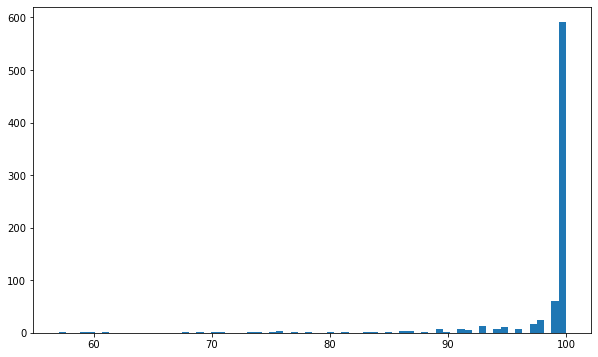

In [15]:
plt.figure(figsize=(10,6))
plt.hist(ratings_new['num_of_ratings'],bins=70)
plt.show()

In [16]:
##recommendation

In [17]:
booksmat = dff.pivot_table(index="user_id",columns="original_title",values="rating")

In [18]:
def predict_book(book):
    book_ratings = booksmat[book]
    similar_to_book = booksmat.corrwith(book_ratings)
    corr_book = pd.DataFrame(similar_to_book,columns=['Correlation'])
    corr_book.dropna(inplace=True)
    predictions = corr_book[corr_book["Correlation"]>0].sort_values(by="Correlation",ascending=False)
    return predictions

In [ ]:
book = input("Enter the book title: ")
predictions = predict_book(book)
predictions.head()